In [20]:
import os
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.cluster import AgglomerativeClustering
import PyPDF2

def extract_text_from_pdf(pdf_path):
    text = ""
    with open(pdf_path, 'rb') as pdf_file:
        pdf_reader = PyPDF2.PdfReader(pdf_file)
        for page in pdf_reader.pages:
            text += page.extract_text()
    return text

directory_path = "data/"  

syllabusList = []
titles = []

# print(os.startfile("data/A&A.pdf"))

# need to do some preprocessing to get syably in order 

for filename in os.listdir(directory_path):
   

   if filename.endswith('.pdf'):
        
        title = directory_path + filename[0:-4] + ".txt"
#         print(title)
        #         titles.append(filename)
        
        text = extract_text_from_pdf(directory_path + filename)
#         words = text.split()
#         print(words)
        with open(title, "w", encoding="utf-8") as file:
            # Write the text to the file
#             print(file)
            file.write(text)
            
for filename in os.listdir(directory_path):
   
    if filename.endswith('.txt'):
        
        titles.append(filename)
        newSyllabus = open(directory_path + filename, errors="ignore")
#         print(newSyllabus)
        syllabusList.append(newSyllabus)


print(syllabusList[0])

<_io.TextIOWrapper name='data/A&A.txt' mode='r' encoding='cp1252'>


In [2]:
import numpy as np
from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram

from sklearn.cluster import AgglomerativeClustering
from sklearn.datasets import load_iris


def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack(
        [model.children_, model.distances_, counts]
    ).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs, labels=titles, leaf_rotation=90)
    print("linkage_matrix")
    print(linkage_matrix)
    
vectorizer = CountVectorizer(input='file', stop_words='english', ngram_range = (1,1), token_pattern="[^\W\d_]+")

# so when I do them togther i seem to get the same size vector 
vectors = vectorizer.fit_transform(syllabusList)
print(vectors[0].shape)
print(vectors[1].shape)
print(vectors[2].shape)
# print(vectors)
# print(vectorizer.vocabulary_)
similarity = cosine_similarity(vectors)
print(similarity)

model = AgglomerativeClustering(distance_threshold=0, n_clusters=None)

model = model.fit(similarity)
# # print(model)
    
# # so iris is a lot of data like that 
# iris = load_iris()
# # print(iris)
# # [4.9, 3. , 1.4, 0.2],

# X = iris.data
# # print(X)
# # X is now just the data I guess there are some 
# # setting distance_threshold=0 ensures we compute the full tree.
# model = AgglomerativeClustering(distance_threshold=0, n_clusters=None)

# model = model.fit(X)
# # print(model)



(1, 4109)
(1, 4109)
(1, 4109)
[[1.         0.32339411 0.18203794 0.15278125 0.16771275 0.12961333
  0.12814937 0.39411462 0.37392727 0.148819   0.05466398 0.1305263
  0.1614909 ]
 [0.32339411 1.         0.37636168 0.16587094 0.1236202  0.11621314
  0.10877153 0.32515128 0.24653769 0.12314311 0.10321322 0.12527559
  0.12922877]
 [0.18203794 0.37636168 1.         0.30379657 0.31410888 0.24446121
  0.26666619 0.50950361 0.19853335 0.31950171 0.15463988 0.31831913
  0.28246713]
 [0.15278125 0.16587094 0.30379657 1.         0.54043275 0.34008522
  0.2092661  0.21472638 0.33592753 0.38434089 0.19452617 0.3942239
  0.33717632]
 [0.16771275 0.1236202  0.31410888 0.54043275 1.         0.35151079
  0.25730899 0.24391755 0.29607279 0.43246199 0.24383631 0.38164597
  0.35225353]
 [0.12961333 0.11621314 0.24446121 0.34008522 0.35151079 1.
  0.19363726 0.24937819 0.3202526  0.45684928 0.16395591 0.41247844
  0.35402924]
 [0.12814937 0.10877153 0.26666619 0.2092661  0.25730899 0.19363726
  1.        

linkage_matrix
[[ 9.         11.          0.64691384  2.        ]
 [ 3.          4.          0.65918918  2.        ]
 [12.         13.          0.67657916  3.        ]
 [ 2.          7.          0.75128484  2.        ]
 [ 5.         15.          0.96481721  4.        ]
 [ 0.          1.          0.99050092  2.        ]
 [ 8.         17.          1.13428243  5.        ]
 [14.         19.          1.19418051  7.        ]
 [16.         18.          1.22782086  4.        ]
 [ 6.         10.          1.2632465   2.        ]
 [20.         22.          1.5018903   9.        ]
 [21.         23.          2.05838704 13.        ]]


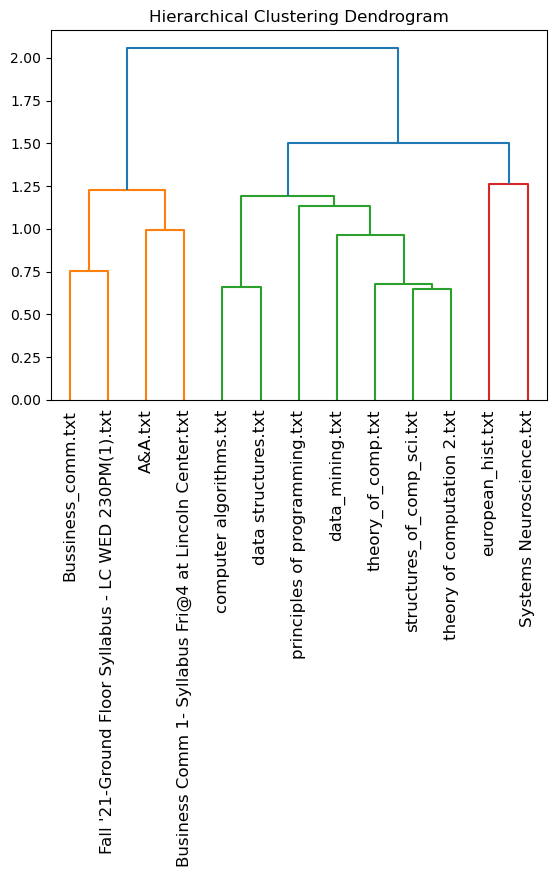

In [3]:
plt.title("Hierarchical Clustering Dendrogram")
# plot the top three levels of the dendrogram
plot_dendrogram(model, truncate_mode="level", p=5)
# plt.xlabel("Number of points in node (or index of point if no parenthesis).")
# plt.xticks(ticks=[5, 10, 15, 20, 25], labels=titles, rotation=90)
plt.show()

In [4]:
directory_path = "machine_learning/"  

syllabusList = []
titles = []

# print(os.startfile("data/A&A.pdf"))

# need to do some preprocessing to get syably in order 

for filename in os.listdir(directory_path):
   

   if filename.endswith('.pdf'):
        
        title = directory_path + filename[0:-4] + ".txt"
        print(title)
        #         titles.append(filename)
        
        text = extract_text_from_pdf(directory_path + filename)
#         words = text.split()
#         print(words)
        with open(title, "w", encoding="utf-8") as file:
            # Write the text to the file
            print(file)
            file.write(text)
        
for filename in os.listdir(directory_path):
   
    if filename.endswith('.txt'):
        
        titles.append(filename)
        newSyllabus = open(directory_path + filename, errors="ignore")
        print(newSyllabus)
        syllabusList.append(newSyllabus)


# print(syllabusList[0])

machine_learning/Machine Learning Official Syllabus nyu.txt
<_io.TextIOWrapper name='machine_learning/Machine Learning Official Syllabus nyu.txt' mode='w' encoding='utf-8'>
machine_learning/machine learning toronto.txt
<_io.TextIOWrapper name='machine_learning/machine learning toronto.txt' mode='w' encoding='utf-8'>
machine_learning/ML Course Syllabus-Aug2022 inadian university.txt
<_io.TextIOWrapper name='machine_learning/ML Course Syllabus-Aug2022 inadian university.txt' mode='w' encoding='utf-8'>
machine_learning/syllabus5800 (2).txt
<_io.TextIOWrapper name='machine_learning/syllabus5800 (2).txt' mode='w' encoding='utf-8'>
<_io.TextIOWrapper name='machine_learning/machine learning Austin Texas.txt' mode='r' encoding='cp1252'>
<_io.TextIOWrapper name='machine_learning/machine learning CMU.txt' mode='r' encoding='cp1252'>
<_io.TextIOWrapper name='machine_learning/Machine Learning Official Syllabus nyu.txt' mode='r' encoding='cp1252'>
<_io.TextIOWrapper name='machine_learning/machine l

<Axes: >

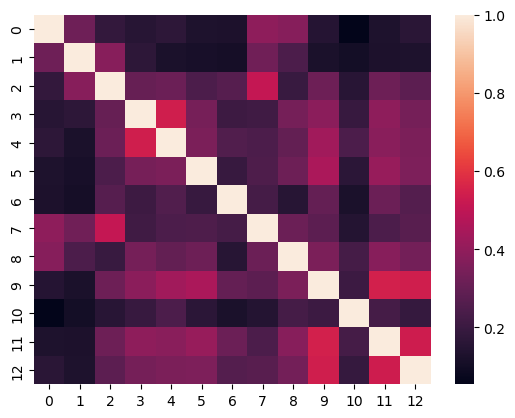

In [5]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

sns.heatmap(similarity)

# plt.yticks(ticks=[0.5, 1.5, 2.5, 3.5, 4.5], labels=titles, rotation=0)

# plt.xticks(ticks=[0.5, 1.5, 2.5, 3.5, 4.5], labels=titles, rotation=90)



In [6]:
vectorizer = CountVectorizer(input='file', stop_words='english', ngram_range = (1,1), token_pattern="[^\W\d_]+")

# so when I do them togther i seem to get the same size vector 
vectors = vectorizer.fit_transform(syllabusList)
print(vectors[0].shape)
print(vectors[1].shape)
print(vectors[2].shape)
# print(vectors)
# print(vectorizer.vocabulary_)
similarity = cosine_similarity(vectors)
print(similarity)

model = AgglomerativeClustering(distance_threshold=0, n_clusters=None)

model = model.fit(similarity)

(1, 2110)
(1, 2110)
(1, 2110)
[[1.         0.24750464 0.23997004 0.32838708 0.48797025 0.32366228]
 [0.24750464 1.         0.26273399 0.43650851 0.32057209 0.52546253]
 [0.23997004 0.26273399 1.         0.22191096 0.36266552 0.48541544]
 [0.32838708 0.43650851 0.22191096 1.         0.35398656 0.45692182]
 [0.48797025 0.32057209 0.36266552 0.35398656 1.         0.38459467]
 [0.32366228 0.52546253 0.48541544 0.45692182 0.38459467 1.        ]]


linkage_matrix
[[1.         5.         0.71433482 2.        ]
 [0.         4.         0.74101961 2.        ]
 [3.         6.         0.84146914 3.        ]
 [2.         8.         1.10420067 4.        ]
 [7.         9.         1.24003764 6.        ]]


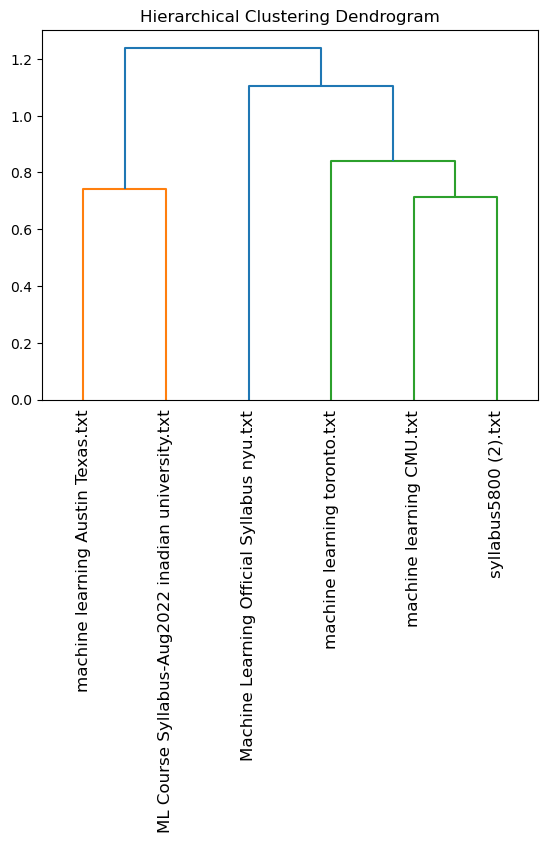

In [7]:
plt.title("Hierarchical Clustering Dendrogram")
# plot the top three levels of the dendrogram
plot_dendrogram(model, truncate_mode="level", p=5)
# plt.xlabel("Number of points in node (or index of point if no parenthesis).")
# plt.xticks(ticks=[5, 10, 15, 20, 25], labels=titles, rotation=90)
plt.show()

In [58]:
# Open the file in read mode

course_descr = []
titles = []


with open('cs_courses/CISC.txt', errors="ignore") as file:
    # Read each line in the file
    for line in file:
        
        if line.startswith("CISC"): 
            # Print each line
            words = line.split(".")
            titles.append(words[1].strip())
            print("title")
            print('\t' + words[1].strip())
        elif line == "\n" or line.startswith("Attribute") or line.startswith("Mutually Exclusive") or line.startswith("Prerequisite"):
            continue
        else:
            print("\t\tdescription")
            print(line.strip()[0])
          
            course_descr.append(line.strip())

print(len(course_descr))
print(len(titles))

title
	Discrete Structures
		description
A
title
	Computer Programming C++
		description
C
title
	Data Structures
		description
T
title
	Computer Organization
		description
S
title
	Network Essentials
		description
T
title
	Computer Graphics
		description
T
title
	Internet and Web Programming
		description
T
title
	JavaScript
		description
T
title
	Foundations of Comp Sci
		description
T
title
	Big Data Analytics
		description
T
title
	Optimization Methods
		description
T
title
	Computer Language Theory
		description
A
title
	Video Game Design and Development
		description
T
title
	Database
		description
W
title
	Machine Learning in Finance
		description
T
title
	Programming with Python
		description
T
title
	Mobile Device Programming
		description
T
title
	Applied Statistics and Probability
		description
T
title
	Mathematics for Data Science
		description
T
title
	Data Analytics Tools and Scripting
		description
T
title
	Programming Languages
		description
T
title
	Cloud Computing
		d

In [59]:
vectorizer = CountVectorizer(stop_words='english', ngram_range = (1,1))

# course_descr = [
#     'This is the first document.',
#     'This document is the second document.',
#     'And this is the third one.',
#     'Is this the first document?',
# ]

# corpus = [
#     'This is the first document.',
#     'This document is the second document.',
#     'And this is the third one.',
#     'Is this the first document?',
# ]
# vectorizer = CountVectorizer()
X = vectorizer.fit_transform(corpus)


# so when I do them togther i seem to get the same size vector 
vectors = vectorizer.fit_transform(course_descr)
# print(vectors[0])
# print(vectors[1].shape)
# print(vectors[2].shape)
# print(vectors)
# print(vectorizer.vocabulary_)
similarity = cosine_similarity(vectors)
print(similarity)

model = AgglomerativeClustering(distance_threshold=0, n_clusters=None)

model = model.fit(similarity)

[[1.         0.         0.         ... 0.         0.         0.        ]
 [0.         1.         0.05198752 ... 0.10067341 0.04393748 0.02739983]
 [0.         0.05198752 1.         ... 0.06454972 0.12677314 0.02635231]
 ...
 [0.         0.10067341 0.06454972 ... 1.         0.10910895 0.10206207]
 [0.         0.04393748 0.12677314 ... 0.10910895 1.         0.04454354]
 [0.         0.02739983 0.02635231 ... 0.10206207 0.04454354 1.        ]]


linkage_matrix
[[1.05000000e+02 1.06000000e+02 0.00000000e+00 2.00000000e+00]
 [4.40000000e+01 4.50000000e+01 3.43599930e-02 2.00000000e+00]
 [5.00000000e+01 5.10000000e+01 3.82169853e-02 2.00000000e+00]
 [4.80000000e+01 4.90000000e+01 5.96971270e-02 2.00000000e+00]
 [1.12000000e+02 1.13000000e+02 4.52828696e-01 4.00000000e+00]
 [4.30000000e+01 4.70000000e+01 5.19024678e-01 2.00000000e+00]
 [4.20000000e+01 4.60000000e+01 6.26258979e-01 2.00000000e+00]
 [9.00000000e+00 3.90000000e+01 7.04933001e-01 2.00000000e+00]
 [1.07000000e+02 1.10000000e+02 7.53653516e-01 3.00000000e+00]
 [7.00000000e+01 8.00000000e+01 7.80216249e-01 2.00000000e+00]
 [3.40000000e+01 8.70000000e+01 8.32166628e-01 2.00000000e+00]
 [6.60000000e+01 1.16000000e+02 8.49456985e-01 3.00000000e+00]
 [4.00000000e+01 7.40000000e+01 8.54151796e-01 2.00000000e+00]
 [2.10000000e+01 6.70000000e+01 8.71166975e-01 2.00000000e+00]
 [6.90000000e+01 7.90000000e+01 8.89558825e-01 2.00000000e+00]
 [1.40000000e+01 5.90000000e+01 8.988967

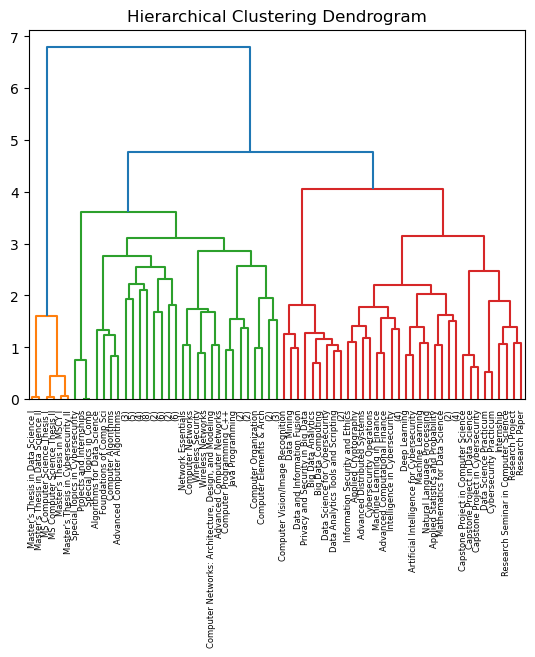

<Figure size 5000x5000 with 0 Axes>

In [69]:
plt.title("Hierarchical Clustering Dendrogram")
# plot the top three levels of the dendrogram
plot_dendrogram(model, truncate_mode="level", p=7)

plt.figure(figsize=(50, 50))
# plt.xlabel("Number of points in node (or index of point if no parenthesis).")
# plt.xticks(ticks=[5, 10, 15, 20, 25], labels=titles, rotation=90)
plt.show()